<a href="https://colab.research.google.com/github/Alexval259/predicciones_ventas/blob/main/week3_proyecto_prediccion_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Semana 3


In [ ]:
# Los datos trabajados en la semana 2 fueron exportados al csv Data_fixed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename='/content/drive/MyDrive/Coding_dojo/data_fixed.csv'
df=pd.read_csv(filename)

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8514,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8515,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8516,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8517,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# categorias existentes para analiss
df2 = df.select_dtypes(include=['object'])
for column in df2.columns:
    print(column)
    print(df[column].value_counts())
    print()
# from chat gpt,

Item_Identifier
FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
         ..
DRF48     1
FDY43     1
FDC23     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1555, dtype: int64

Item_Fat_Content
Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT013    932
OUT027    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: Outlet_Identifier, dtype: int

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

    Histograma para ver las distribuciones de diversas características en el conjunto de datos.
    Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.
    Mapa de calor de la correlación entre las características.

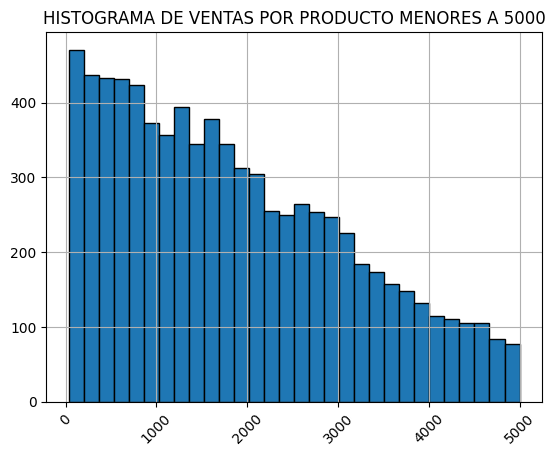

In [ ]:
#df['Item_Outlet_Sales'].hist()
price_filter = df.loc[:, 'Item_Outlet_Sales'] <= 5000
df.loc[price_filter, 'Item_Outlet_Sales'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('HISTOGRAMA DE VENTAS POR PRODUCTO MENORES A 5000 USD');
plt.show()

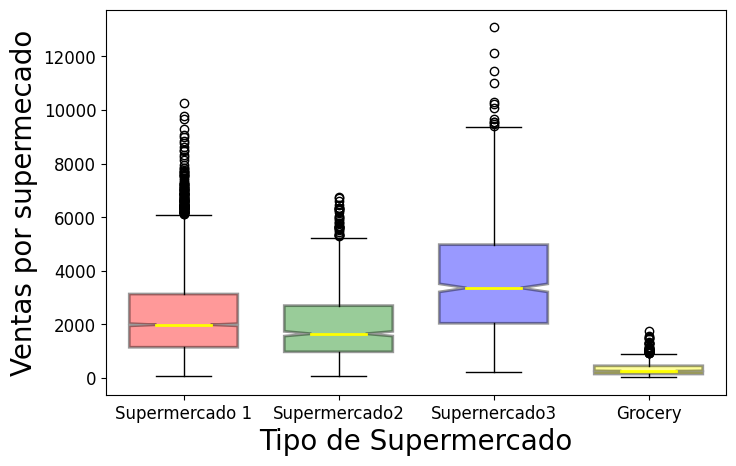

In [ ]:
# GRAFICA DE BOXPLOTS DE OUTLET TYPES Y VENTAS
super1 = df.loc[df['Outlet_Type']=='Supermarket Type1','Item_Outlet_Sales']
super2 = df.loc[df['Outlet_Type']=='Supermarket Type2','Item_Outlet_Sales']
super3= df.loc[df['Outlet_Type']=='Supermarket Type3','Item_Outlet_Sales']
grocery1 = df.loc[df['Outlet_Type']=='Grocery Store','Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([super1,super2,super3,grocery1],
           notch = True,
           labels=['Supermercado 1', 'Supermercado2','Supernercado3','Grocery'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
boxplot2 = boxplots['boxes'][1]
boxplot2.set_facecolor('green')
boxplot3 = boxplots['boxes'][2]
boxplot3.set_facecolor('blue')
boxplot4 = boxplots['boxes'][3]
boxplot4.set_facecolor('yellow')
plt.xlabel('Tipo de Supermercado', fontsize = 20);
plt.ylabel('Ventas por supermecado', fontsize = 20);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

In [ ]:
## Estimacion de ventas de productos Low Fat y Regular
ventas_totales=df['Item_Outlet_Sales'].sum()
vent_grasa=((df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())*100/ventas_totales).round(2)

In [ ]:
vent_grasa[1]

35.96

In [ ]:
# ventasa por tipo de local, 
vent_tipolocal=df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

In [ ]:
vent_tipolocal=(vent_tipolocal/1e+6).round(3)


In [ ]:
vent_tipolocal # expresada en Millones 

Outlet_Type
Grocery Store         0.368
Supermarket Type1    12.917
Supermarket Type2     1.852
Supermarket Type3     3.444
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
vent_tipolocal.index

Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object', name='Outlet_Type')

In [ ]:
## Estimacion de ventas de productos Low Fat y Regular
ventas_totales=df['Item_Outlet_Sales'].sum()
vent_tipo=((df.groupby('Item_Type')['Item_Outlet_Sales'].sum())*100/ventas_totales).round(2)
vent_tipo

Item_Type
Baking Goods              6.81
Breads                    2.98
Breakfast                 1.25
Canned                    7.77
Dairy                     8.18
Frozen Foods              9.82
Fruits and Vegetables    15.18
Hard Drinks               2.46
Health and Hygiene        5.62
Household                11.06
Meat                      4.94
Others                    1.75
Seafood                   0.80
Snack Foods              14.68
Soft Drinks               4.81
Starchy Foods             1.89
Name: Item_Outlet_Sales, dtype: float64

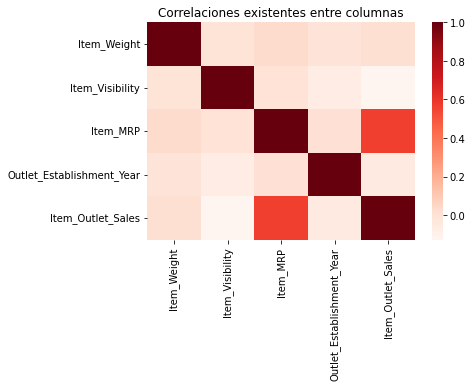

In [ ]:
# grafico de correlaciones
corr = df.corr()
sns.heatmap(corr, cmap = 'Reds')
plt.title('Correlaciones existentes entre columnas');